In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wordcloud

In [3]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 1.0MB 15.6MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp37-none-any.whl size=16368 sha256=3c5446a72797a5f53471fedcaf88d954e5737fd0ccd23b3f0b09f55949276f1c
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
Successfully built googletrans


In [4]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7MB 8.0MB/s 


In [5]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [6]:
!pip install emoji

     |████████████████████████████████| 133kB 8.1MB/s 


In [8]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji
import pandas as pd
from googletrans import Translator
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import re,string
from matplotlib import pyplot as plt

##
from nltk.classify import  MaxentClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import f1_score

#pyspellchecker
spell = SpellChecker()


In [9]:
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords 

In [11]:

# data_lac is 1 lac randome sample out of 1.6 million dataset used here

data = pd.read_csv("/content/drive/MyDrive/data_lac.csv",skip_blank_lines=True,encoding = "latin") 

data

,label,Tweet,cleaned_tweets
0,positive,21st was a successs,just success
1,positive,dad said YES regarding my Cebu trip! i wonder...,dad say yes regard cell trip wonder serious...
2,negative,@nickjonas Ok so you Joe and Kevin do this so ...,okay joe kevin often always send question mi...
3,negative,DDTycoon isn't like the other dash games. It'...,tycoon dislike dash game bit rubbish
4,positive,@MamaCitaa_ awww poor thing...lol oh okay hope...,amazement poor thing 'll oh okay hopefully d...
...,...,...,...
99995,negative,.@ShaddyBabeBiTch she texted me &amp; i spoke ...,texted speak mom obviously pain stable un...
99996,positive,Two hours in - It's not helping that the glori...,two hour not help glorious weather awaken li...
99997,negative,"@manaloloandlola i knowww! HAHAH, yes, but i c...",knoww haha yes suffer guy
99998,positive,Allah anal? babal? bÃ¯Â¿Â½yÃ¯Â¿Â½tsÃ¯Â¿Â½n Onu...,allah anal cabal bit our day


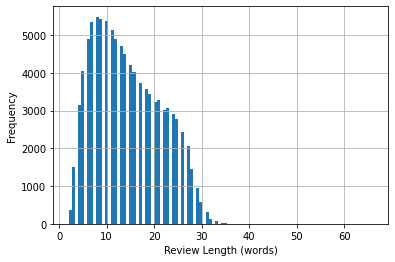

In [12]:

## Getting the number of words by splitting them by a space
words_per_review = data.Tweet.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Average Number of words per tweet
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 14.41435
Skewness: 0.3720461919568061


In [14]:
# Positive and Neagtive tweet dataset
print(data['label'].value_counts())
percent_val = 100 * data['label'].value_counts()/len(data)
print("Postive Reviews: "+str(percent_val.positive)+'%')
print("Negative Reviews: "+str(percent_val.negative)+'%')

positive    50024
negative    49976
Name: label, dtype: int64
Postive Reviews: 50.024%
Negative Reviews: 49.976%


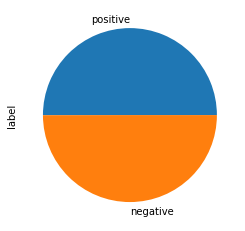

In [15]:

percent_val.plot.pie()
plt.show()


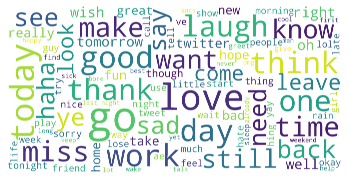

In [16]:
# Should be done over clean tweets
word_cloud_text = ''.join(data['cleaned_tweets'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [17]:
data.columns

Index(['label', 'Tweet', 'cleaned_tweets'], dtype='object')

In [ ]:
#dropping unwanted columns
data=data.drop(columns=['0', '1467810369','Mon Apr 06 22:19:45 PDT 2009','NO_QUERY','_TheSpecialOne_'])

In [ ]:
data['Tweet']=data["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]


In [ ]:

data=data.drop(columns=["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"])
data.head()

,label,Tweet
1204503,positive,21st was a successs
980721,positive,dad said YES regarding my Cebu trip! i wonder...
589373,negative,@nickjonas Ok so you Joe and Kevin do this so ...
88531,negative,DDTycoon isn't like the other dash games. It'...
1098139,positive,@MamaCitaa_ awww poor thing...lol oh okay hope...


In [18]:
#Removes Emojis
def remove_emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [20]:
def shortform():
    
    return {
        
        "couldn't":"could not","couldn't've":"could not have","could've":"could have","didn't":"did not","doesn't":"does not",
        "don't":"do not", "em":"them","everyone's":"everyone is", "gimme":"give me","he'd":"he would","he'll":"he will",
        "he's":"he is", "ain't":"is not", "aren't":"are not", "can't":"cannot", "'cause":"because", "he've":"he have",
        "how'd":"how would", "how'll":"how will", "how're":"how are", "how's":"how is","I'll":"I will","I'm":"I am",
        "im":"I am", "isn't":"is not","it'll":"it will","it's":"it is", "I've":"I have","kinda":"kind of","let's":"let us",
        "may've":"may have", "mightn't":"might not","might've":"might have","mustn't":"must not","mustn't've":"must not have",
        "must've":"must have", "needn't":"need not", "oughtn't":"ought not","gonna":"going to", "gotta":"got to",
        "hadn't":"had not","hasn't":"has not", "haven't":"have not", "shalln't":"shall not",  "shan't":"shall not", "she'd":"she would",
        "she'll":"she will",  "she's":"she is",  "shouldn't":"should not", "shouldn't've":"should not have",
        "should've":"should have", "somebody's":"somebody is",  "someone's":"someone is", "something's":"something is",
        "that'd":"that would","that'll":"that will", "that're":"that are", "that's":"that is",
        "there'd":"there would", "there'll":"there will",
        "there're":"there are","there's":"there is", "these're":"these are","they'd":"they would",
        "they'll":"they will","they're":"they are", "they've":"they have",      "this's":"this is",
        "those're":"those are", "wanna":"want to", "wasn't":"was not", "we'd":"we would",
        "we'd've":"we would have", "we'll":"we will","we're":"we are",  "weren't":"were not",
        "we've":"we have", "what'd":"what did", "what'll":"what will", "what're":"what are",
        "what's":"what is", "what've":"what have", "when's":"when is", "where'd":"where did",
        "where're":"where are", "where's":"where is","where've":"where have","which's":"which is",
        "who'd":"who would", "who'd've":"who would have","who'll":"who will", "who're":"who are",
        "who's":"who is", "who've":"who have", "why'd":"why did","why're":"why are",
        "why's":"why is", "won't":"will not","wouldn't":"would not", "would've":"would have",
        "y'all":"you all", "you'd":"you would", "you'll":"you will", "you're":"you are",
        "you've":"you have",  "luv":"love","shit":"bad", "tmrw":"tomorrow",
        "u":"you", "ur":"your","k":"okay", "ok":"okay","da":"the","tom":"tomorrow", "Tom":"tomorrow", "wassup":"what is up with you",
        "yo":"greet","hey":"greet","lol":"laugh","lmao":"laugh", "Lmao":"laugh","rofl":"laugh", "y":"why",
        "wut":"what",   "wat":"what", "stfu":"angry", "wtf":"angry",  "ya":"yes",  "yeah":"yes",
        "umm":"confused",  "hmmm":"confused", "awww":"amazement","aww":"amazement",
        "can't":"cannot","Can't":"cannot", "CAN'T":"cannot","awe":"amazement",
        "Awe":"amazement","ugh":"sad", "ughh":"sad",
       
        }



In [21]:
def emoticons():
    
    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        ":‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":(":"sad",
        ":(":"sad",
        "-_-":"angry",
        ":|":"normal",
         "<3":"love"
        }




In [23]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=shortform()
    emoji=emoticons()
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word) 
        
        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            word=spell.correction(word.lower())
            word=re.sub("[0-9]+","",word)
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word) 
            if(len(word)!=1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    return lemmatization(cleaned_st)




In [28]:
def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
    st=""
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    #print("lemi",st)
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                    #print(l)
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        #print(antonyms)
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    
    return new_st



In [27]:
#nltk module to get the sentiment polarity
def sentiment_analysis(sent):
        sid = SentimentIntensityAnalyzer()
        print(sent)
        ss = sid.polarity_scores(sent)
        w=ss['pos']
        q=ss['neg']
        print(w-q)
        return w-q



In [29]:
def start(text):
    #removes html tags
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    result=0
    new_str=""
    for i in new_text:

      j=remove_emoji(i)
      res=removal_of_noise(j)
      new_str=new_str+" "+res
    return new_str



In [30]:
data['tweet_lower']=data['Tweet'].str.lower()
data.head()

,label,Tweet,cleaned_tweets,tweet_lower
0,positive,21st was a successs,just success,21st was a successs
1,positive,dad said YES regarding my Cebu trip! i wonder...,dad say yes regard cell trip wonder serious...,dad said yes regarding my cebu trip! i wonder...
2,negative,@nickjonas Ok so you Joe and Kevin do this so ...,okay joe kevin often always send question mi...,@nickjonas ok so you joe and kevin do this so ...
3,negative,DDTycoon isn't like the other dash games. It'...,tycoon dislike dash game bit rubbish,ddtycoon isn't like the other dash games. it'...
4,positive,@MamaCitaa_ awww poor thing...lol oh okay hope...,amazement poor thing 'll oh okay hopefully d...,@mamacitaa_ awww poor thing...lol oh okay hope...


In [ ]:
clean_list=[]
p=0;
for i in data["Tweet"]:
    print(i)
    x=start(i)
    print(x)
    p+=1
    if p >10:

      break
    clean_list.append(x)
    

@LMW1305 will add to the list 
  add list
--------------------------
@MoriahJovan Oh! You mean it's not you? I thought it had that pre-Raphaelite look. 
  oh  mean not  think pre raphaelite look
--------------------------
ok so its past 6 and i havent eaten since my break at like 930ish this morning, i need food, i'm SOOOOOOOOOOOOOOOO hungry 
  okay past havent eaten since break like ish morning need food soooooooooooooooo hungry
--------------------------
I get stupidly excited when new people follow me and go and look and it's usually just spammers. 
  get stupidly excited new people follow go look usually spammer
--------------------------
@WaltEly Hey, thanks for the correction! 
  hey thanks correction
--------------------------
@ddlovato haha that was funny 
  haha funny
--------------------------
@Mucho_Maas Just download the Skype application! That does suck though 
  dead skype application  suck though
--------------------------
@officialashleyg must be hard 
  must hard
-----

In [ ]:

new_list=[]
new_list = clean_list
len(clean_list)

100000

In [ ]:
with open('cleaned_tweet1.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item) 
     

In [31]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "/content/drive/MyDrive/cleaned_tweet2.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

In [32]:
#reading the adjective file
filename = "/content/drive/MyDrive/adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

In [33]:
#All adjectives words in the file
all_words=[]
negative=["not"]
for i in data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
        #if(word in adjectives ):
            all_words.append(word)

len(all_words)

100736

In [34]:
#creating a frequency distribution of each adjectives. 
import nltk
BagOfWords = nltk.FreqDist(all_words)
BagOfWords
len(BagOfWords)

1049

In [35]:
# listing the  5000 most frequent words
word_features = list(BagOfWords.keys())[:5000]
len(word_features)
#word_features

1049

In [ ]:
#after preprocessing data

data.to_csv("/content/data_lac.csv",index=False)


In [36]:
data

,label,Tweet,cleaned_tweets,tweet_lower
0,positive,21st was a successs,just success,21st was a successs
1,positive,dad said YES regarding my Cebu trip! i wonder...,dad say yes regard cell trip wonder serious...,dad said yes regarding my cebu trip! i wonder...
2,negative,@nickjonas Ok so you Joe and Kevin do this so ...,okay joe kevin often always send question mi...,@nickjonas ok so you joe and kevin do this so ...
3,negative,DDTycoon isn't like the other dash games. It'...,tycoon dislike dash game bit rubbish,ddtycoon isn't like the other dash games. it'...
4,positive,@MamaCitaa_ awww poor thing...lol oh okay hope...,amazement poor thing 'll oh okay hopefully d...,@mamacitaa_ awww poor thing...lol oh okay hope...
...,...,...,...,...
99995,negative,.@ShaddyBabeBiTch she texted me &amp; i spoke ...,texted speak mom obviously pain stable un...,.@shaddybabebitch she texted me &amp; i spoke ...
99996,positive,Two hours in - It's not helping that the glori...,two hour not help glorious weather awaken li...,two hours in - it's not helping that the glori...
99997,negative,"@manaloloandlola i knowww! HAHAH, yes, but i c...",knoww haha yes suffer guy,"@manaloloandlola i knowww! hahah, yes, but i c..."
99998,positive,Allah anal? babal? bÃ¯Â¿Â½yÃ¯Â¿Â½tsÃ¯Â¿Â½n Onu...,allah anal cabal bit our day,allah anal? babal? bã¯â¿â½yã¯â¿â½tsã¯â¿â½n onu...


In [45]:
#Spliting into test data and train data
y=data["label"]
x=data.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [46]:
x_train.shape

(70000, 3)

In [54]:
#creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []
X_train = X_train.append(x_train)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = X_test.append(x_test)

In [55]:
#spliting into train sets for training 
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]


In [57]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1    

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

In [59]:
from sklearn.metrics import recall_score, precision_score
#making a list for both the classifiers 
classifiers=[]
#making a list of classifiers with their accuracy
accuracy=[]

In [67]:
#Stochastic Gradient Descent classifier
sgd_classifier = SklearnClassifier(SGDClassifier())
sgd_classifier.train(training_set_formatted)
print("Stochastic Gradient Descent Classifier_classifier accuracy percent:", (nltk.classify.accuracy(sgd_classifier, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [sgd_classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')
accuracy.append([(nltk.classify.accuracy(sgd_classifier, test_set_formatted))*100,"SGD"])
classifiers.append([sgd_classifier,"Stochastic Gradient Descent classifier"])
print("Stochastic Gradient Descent")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Stochastic Gradient Descent Classifier_classifier accuracy percent: 76.5
Stochastic Gradient Descent
              precision    recall  f1-score   support

    positive       0.79      0.73      0.76     15053
    negative       0.75      0.80      0.77     14947

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.76     30000
weighted avg       0.77      0.77      0.76     30000



In [68]:
#Max Entropy classifier

def max_ent(training_set_formatted):
    numIterations = 3
    algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
    classifier.show_most_informative_features(5)
    return classifier
    
maxent_classifier=max_ent(training_set_formatted)
ground_truth = [r[1] for r in test_set_formatted]
preds = [maxent_classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

print("Accuracy : ",f1_score(ground_truth, preds, labels = ['positive', 'negative'], average = 'micro')*100)
accuracy.append([(nltk.classify.accuracy(maxent_classifier, test_set_formatted))*100,"MaxEnt"])
#Adding it to the list of classifiers
classifiers.append([maxent_classifier,"Max Entropy classifier"])
print()
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


  ==> Training (3 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.501
             2          -0.69312        0.816
         Final          -0.69309        0.816
  -0.000 worried==True and label is 'positive'
  -0.000 followfriday==True and label is 'negative'
  -0.000 sneeze==True and label is 'positive'
  -0.000 emergency==True and label is 'positive'
  -0.000 fol==True and label is 'positive'
Accuracy :  75.08666666666667

              precision    recall  f1-score   support

    positive       0.73      0.81      0.76     15053
    negative       0.78      0.69      0.74     14947

    accuracy                           0.75     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.75      0.75      0.75     30000



In [70]:
accuracy

[[76.41333333333333, 'SGD'],
 [76.41333333333333, 'SGD'],
 [75.08666666666667, 'MaxEnt'],
 [76.5, 'SGD'],
 [75.08666666666667, 'MaxEnt']]

In [105]:
classifier=classifiers[0]
classifier.append(classifiers[2])
classifier

[<SklearnClassifier(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False))>,
 'SGD classifier',
 [<ConditionalExponentialClassifier: 2 labels, 39271 features>,
  'Max Entropy classifier']]

In [108]:
def features_extraction(text):
    new_list=[]
    for i in text.split():
        if(i in adjectives):
            new_list.append(i)
    return new_list

In [109]:
def classify_text(text):
    cleaned_text=start(text)
    temp=features_extraction(cleaned_text)
    test_data=list_to_dict(temp)
    print(temp)
    print("Tweet by user : ",text)
    for i in classifier:
        print(i[1])
        determined_label=i[0].classify(test_data)
        print("Tweet has sentiment: ",determined_label)
        print("******************************")
 

In [110]:
#input from the user which will be used to classify 
def fun(input_text):
    translator = Translator()
    x=translator.translate(input_text,src="hi",dest="en")
    classify_text(x.text)

In [111]:
#input from the user which will be used to classify 
from textblob import TextBlob

def fun2(input_text):
    l=input_text.split()
    st=""
    for i in l:
        word=TextBlob(i)
        if(word.detect_language()=="hi"):
            translator = Translator()
            x=translator.translate(i,src="hi",dest="en")
            st=st+" "+x.text
        else:
            st=st+" "+i
    classify_text(st)

In [112]:
def sentiment_detect(input_text):
    l=input_text.split()
    flag=0
    for i in l:
        k=len(i)
        if(k<3):
            flag=1
            hing(input_text)
    if(not(flag)):
        hing2(input_text)
            

In [113]:
sentiment_detect("tum acche ho")

['good']
Tweet by user :  You're good
SGD classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  positive
******************************


In [115]:
sentiment_detect("tum log pagal ho")

['crazy']
Tweet by user :  You guys are crazy
SGD classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************


In [116]:
sentiment_detect("tum pagal ho")

['mad']
Tweet by user :  you are mad
SGD classifier
Tweet has sentiment:  negative
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  negative
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  negative
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************


In [117]:
sentiment_detect("tum kharab ho")

['bad']
Tweet by user :  You are bad
SGD classifier
Tweet has sentiment:  negative
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  negative
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  negative
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************


In [118]:
sentiment_detect("you are awesome")

[]
Tweet by user :   you are awesome
SGD classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  positive
******************************


In [119]:
sentiment_detect("you are not accha")

[]
Tweet by user :   you are not good
SGD classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  positive
******************************


In [120]:
sentiment_detect("wo bahut hi ganda insaan hai")

['dirty']
Tweet by user :  He is a very dirty person
SGD classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************
['dirty']
Tweet by user :  He is a very dirty person
SGD classifier
Tweet has sentiment:  positive
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  negative
******************************
Stochastic Gradient Descent classifier
Tweet has sentiment:  positive
******************************
Max Entropy classifier
Tweet has sentiment:  negative
***************************